# Chapter 10

## A classical inference

### A classical inference with low probability of type I error

In [819]:
import numpy as np
import pandas as pd
from scipy.stats import binom, norm
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt   
import metakernel
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
from shapely.geometry import LineString

In [820]:
def normalvisual(mu, var, n):

    varavg = var / n  # variance of the average

    # standard deviation of the average

    sigma = np.sqrt(var)
    sigmaavg = np.sqrt(varavg)

    # Create a range
    x = np.linspace(0, 15, 10000)
    l = arr = np.full(len(x), .05)

    # Create the normal distribution for the range
    y = norm.pdf(x, mu, sigma)
    yavg = norm.pdf(x, mu, sigmaavg)
    tavg = 1-norm.cdf(mu+x, mu, sigmaavg)+norm.cdf(mu-x, mu, sigmaavg)

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the normal distribution on the left subplot
    axs[0].plot(x, yavg)
    axs[1].plot(x, tavg)
    axs[0].set_xlim(9, 15)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)    
    axs[1].plot(x, l, label='.05', color='r')


    # Plot the histogram on the right subplot
    # axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

    # Set titles
    axs[0].set_title('pdf of X̅_{%i}~N(%1.1f, %1.3f)' % (n, mu, varavg))
    axs[1].set_title('probability of |X̅_{%i}-%1.1f|≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % (n, mu))
    axs[1].set_xlabel('c')  # Add x-axis label

    first_line = LineString(np.column_stack((x, tavg)))
    second_line = LineString(np.column_stack((x, l)))
    intersection = first_line.intersection(second_line)

    # ... existing code ...

    intersection = first_line.intersection(second_line)

    axs[1].axvline(x=intersection.x, color='g', label='%1.2f' % intersection.x)
    axs[1].legend()
    

    plt.show()

### Recalling a hypothesis test from the classical school

We are repeatedly and independently measure $X_1, \ldots, X_n$ which we assume to be normally distributed with common unknown mean and known variance. For the sake of concreteness, suppose that the variance is 1.

We want to know the value of $\mu$ such that $X_1, \ldots, X_n\sim N(\mu,1)$.

That is, we imagine we already know that the variance is 1, but we want to know where the center of the bell shape is.

We formulate the hypothesis that the center is at $\mu_0$:

- The null hypothesis $H_0$: $\hspace{5mm}$ $\mu=\mu_0$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $\mu \neq \mu_0$. 

We choose a comparatively large value $c>0$, and we adopt the following test:

- Test: reject $H_0$ if $T_n \geq c$.

where $T_n =\left|\overline{X}_n - \mu_0\right|$ and $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ is the average

If $c$ is large and the null hypothesis is true, then the event $T_n\geq c$ has small probability and thus the Type I error is low. 

In the special case of normals with fixed variance and fixed $n$, the probability of the Type I error is constant across all choices of the null hypothesis, as the following examples illustrate.

In [821]:
interact(normalvisual, 
         mu=FloatSlider(min=0, max=20, step=0.1, value=10.2), 
         var=FloatSlider(min=.1, max=10, step=0.1, value=1), 
         n=FloatSlider(min=1, max=100, step=0.1, value=49))

interactive(children=(FloatSlider(value=10.2, description='mu', max=20.0), FloatSlider(value=1.0, description=…

<function __main__.normalvisual(mu, var, n)>

In [822]:
interact(normalvisual, 
         mu=FloatSlider(min=0, max=20, step=0.1, value=12), 
         var=FloatSlider(min=.1, max=10, step=0.1, value=1), 
         n=FloatSlider(min=1, max=100, step=0.1, value=49))

interactive(children=(FloatSlider(value=12.0, description='mu', max=20.0), FloatSlider(value=1.0, description=…

<function __main__.normalvisual(mu, var, n)>

### Recasting this classical inference as a confidence interval

Suppose that we choose $c$ optimally, right where the type I probability of the event $T_n\geq c$ falls below $.05$. In the above examples, it is $c=.28$.

Hence one has the probability of the event $T_n<c$ is above $.95$.

But one has $T_n<c$ 

iff $-c<\mu_0-\overline{X}_n<c$ 
     
iff $\overline{X}_n-c<\mu_0<\overline{X}_n+c$.

iff $\overline{X}_n-.28<\mu_0<\overline{X}_n+.28$.

Hence the probability that " '$\pm$ c of the average' contains the null hypothesis" is above $.95$. 

And thus the probability that " '$\pm$ .28 of the average' contains the null hypothesis" is above $.95$. 

And this holds regardless of what the null hypothesis is.


## A Bayesian inference

### The components of Bayes' Theorem

Bayes' Theorem takes the following form in the context of statistical inference:

$$p(\theta \mid x) = \frac{p(x\mid \theta)\cdot p(\theta)}{p(x)}$$

which as per usual you remember in the mnemonic:

$$\mathrm{posterior} = \frac{\mathrm{likelihood}\times \mathrm{prior}}{\mathrm{evidence}}$$

Here is a compact summary of the components: 

| concept | notation | definition | how to find value |
|----------|----------|----------|----------|
| prior   | $p(\theta)$   |  prior degree of belief that $X\sim p_{\theta}$  | initially, consult your degrees of belief, which might be recorded in frequency information which you accept; after the initial round, the prior is the previous round's posterior |
| likelihood   | $p(x\mid \theta)$   | probability that $X=x$ conditional on $X\sim p_{\theta}$     | $p_{\theta}(x)$, i.e. input in $x$ to pdf $p_{\theta}$; look at graph or consult computer or book; if in applied context look at "if $\theta$ were ... then $x$ would be ..." statements salient in the subject matter |
| evidence (aka marginal, aka prior predictive distribution)  | $p(x)$  | probability that $X=x$  | use formula $p(x)=\sum_{\theta\in \Theta} p(\theta)\cdot p(x\mid \theta)$; in non-trivial cases use computer  |
| posterior  | $p(\theta \mid x)$  | probability that $X\sim p_{\theta}$ conditional on $X=x$  | Use Bayes' Theorem and three previous rows  |


### Visualizing Bayes' Theorem with uniform prior

Here is a familiar example of Bayes' Theorem:

1. The parameter space is small, with each pdf in it being represented by a solid line in the graph to the top left. In this case, the pdfs are some normals. 

2. We have a uniform prior represented by the pie chart to the bottom left.

3. Using Bayes' Theorem we can calculate $p(\theta\mid x)$ for all values of $\theta,x$: the different values of $\theta$ correspond to the different solid lines on the top right, and the different values of $x$ are on the bottom right. 

4. If observe a value of $x$ and look at the values right above it-- where the colored lines intersect the black vertical line-- we get the posterior $p(\theta\mid x)$. These add up to one and we can represent them in the pie chart to the bottom left.

In [823]:
# size_sample_space, size_parameter_space are positive integers
# prior is list of length size_parameter_space of non-negative numbers that sum to 1
# likelihood is a list of length size_parameter_space 
# where each element is a list of length size_sample_space numbers that sum to 1

def bayes(size_sample_space,size_parameter_space,prior,likelihood, observed_value = None, round_digits = 4):

    if not 0.98 <= sum(prior) <= 1.02:
        raise ValueError("The sum of the prior probabilities must be equal to 1")
    if len(prior) != size_parameter_space:
        raise ValueError("The length of the prior probabilities must be equal to the size of the parameter space")
    if len(likelihood) != size_parameter_space:
        raise ValueError("The length of the likelihood must be equal to the size of the parameter space")
    if any([len(likelihood[i]) != size_sample_space for i in range(size_parameter_space)]):
        raise ValueError("The length of each entry in the likelihood must be equal to the size of the sample space")
  

    sample_space = list(range(size_sample_space))

    parameter_space = list(range(size_parameter_space))

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    parameter_space_names = []

    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    evidence =  []

    for j in sample_space:
        evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

    sample_space_names = []

    for j in sample_space:
        sample_space_names.append(f"x_{j}, evidence = {evidence[j].round(round_digits)}")


    posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

    for i in parameter_space:
        for j in sample_space:
            posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 2 row, 2 columns




    for i in parameter_space:
        if i == 0:
            axs[0,0].plot(sample_space, likelihood[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,0].plot(sample_space, likelihood[i])
            else:
                axs[0,0].plot(sample_space, likelihood[i], label='θ_%i' % i)
    axs[0,0].plot(sample_space, evidence, '--', label='evidence', color = 'black')        
    axs[0,0].set_ylim(0, max(max(likelihood[0]), max(likelihood[1]))+.001)
    axs[0,0].set_title('likelihood p(x | θ)')
    axs[0,0].set_xlabel('x')
    axs[0,0].set_ylim(0, 1.1)
    axs[0,0].legend(loc='upper right')    

    for i in parameter_space:
        if i == 0:
            axs[0,1].plot(sample_space, posterior[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,1].plot(sample_space, posterior[i])
            else:
                axs[0,1].plot(sample_space, posterior[i], label='θ_%i' % i)
    if observed_value is not None:
        axs[0,1].axvline(x=observed_value, linestyle='--', color = 'black', label='observed value')       
    axs[0,1].set_ylim(0, 1.1)
    axs[0,1].set_title('posterior p(θ  | x)')
    axs[0,1].set_xlabel('x')
    axs[0,1].legend(loc='upper right') 

    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)

    fig.suptitle('insert')

    sorted_prior_indices = np.argsort(prior)
    above_02_indices_prior = [i for i in sorted_prior_indices if prior[i] > 0.04]
    labels_prior = [labels[i] if i in above_02_indices_prior else '' for i in range(size_parameter_space)]

    axs[1,0].pie(prior, labels=labels_prior)
    axs[1,0].set_title('prior p(θ) uniform')



    evidence_observed = sum([prior[i]*likelihood[i][observed_value] for i in range(size_parameter_space)])

    posterior_observed = [prior[i]*likelihood[i][observed_value]/evidence_observed for i in range(size_parameter_space)]

    sorted_posterior_indices = np.argsort(posterior_observed)
    above_02_indices_posterior = [i for i in sorted_posterior_indices if posterior_observed[i] > 0.04]
    labels_posterior = [labels[i] if i in above_02_indices_posterior else '' for i in range(size_parameter_space)]


    axs[1,1].pie(posterior_observed, labels=labels_posterior)    
    axs[1,1].set_title('posterior p(θ| %1.2f) non-uniform' % observed_value)

    fig.subplots_adjust(top=.8)

    fig.suptitle('Visualizing Bayes\' Theorem with uniform prior')


    return posterior


In [824]:
def bayes_many_normals(size_sample_space,size_parameter_space, observed_value = None):

    n = size_sample_space
    
    l = size_parameter_space
    
    my_prior = [1/l] * l

    my_mean = [l//2 + .5*(l//2 - k) for k in range(l)]

    my_var = [1] * l

    my_likelihood = [None]*l    

    std_dev = [None]*l

    my_min= [None]*l

    my_max= [None]*l

    for i in range(l):
        std_dev[i] = np.sqrt(my_var[i])

    my_min = min([my_mean[i] - 3*std_dev[i] for i in range(l)])
    my_max = max([my_mean[i] + 3*std_dev[i] for i in range(l)])

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    for i in range(l):
        my_likelihood[i] = norm.pdf(my_sample_space_alt, my_mean[i], std_dev[i])


    bayes(n,l,my_prior,my_likelihood, observed_value = observed_value)
    

In [825]:
interact(bayes_many_normals, 
         size_sample_space= IntSlider(min=1, max=100, step=1, value=50), 
         size_parameter_space= IntSlider(min=1, max=10, step=1, value=4),
         observed_value = IntSlider(min=1, max=99, step=1, value=3))


interactive(children=(IntSlider(value=50, description='size_sample_space', min=1), IntSlider(value=4, descript…

<function __main__.bayes_many_normals(size_sample_space, size_parameter_space, observed_value=None)>

### Visualizing Bayes' Theorem Better with uniform prior

The pie charts are helpful for certain things-- one can e.g. quickly look at them and see how the posterior is non-uniform. 

We can also represent it as a histogram, i.e. by lining up $\theta_0, \theta_1, \ldots$ on $x$-axis and by plotting the values of $p(\theta_0), p(\theta_1), \ldots$.

In [826]:
# size_sample_space, size_parameter_space are positive integers
# prior is list of length size_parameter_space of non-negative numbers that sum to 1
# likelihood is a list of length size_parameter_space 
# where each element is a list of length size_sample_space numbers that sum to 1

def bayes_better(size_sample_space,size_parameter_space,prior,likelihood, observed_value = None, round_digits = 4):

    if not 0.98 <= sum(prior) <= 1.02:
        raise ValueError("The sum of the prior probabilities must be equal to 1")
    if len(prior) != size_parameter_space:
        raise ValueError("The length of the prior probabilities must be equal to the size of the parameter space")
    if len(likelihood) != size_parameter_space:
        raise ValueError("The length of the likelihood must be equal to the size of the parameter space")
    if any([len(likelihood[i]) != size_sample_space for i in range(size_parameter_space)]):
        raise ValueError("The length of each entry in the likelihood must be equal to the size of the sample space")
  

    sample_space = list(range(size_sample_space))

    parameter_space = list(range(size_parameter_space))

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    parameter_space_names = []

    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    evidence =  []

    for j in sample_space:
        evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

    sample_space_names = []

    for j in sample_space:
        sample_space_names.append(f"x_{j}, evidence = {evidence[j].round(round_digits)}")


    posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

    for i in parameter_space:
        for j in sample_space:
            posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 2 row, 2 columns




    for i in parameter_space:
        if i == 0:
            axs[0,0].plot(sample_space, likelihood[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,0].plot(sample_space, likelihood[i])
            else:
                axs[0,0].plot(sample_space, likelihood[i], label='θ_%i' % i)
    axs[0,0].plot(sample_space, evidence, '--', label='evidence', color = 'black')        
    axs[0,0].set_ylim(0, max(max(likelihood[0]), max(likelihood[1]))+.001)
    axs[0,0].set_title('likelihood p(x | θ)')
    axs[0,0].set_xlabel('x')
    axs[0,0].set_ylim(0, 1.1)
    axs[0,0].legend(loc='upper right')    

    for i in parameter_space:
        if i == 0:
            axs[0,1].plot(sample_space, posterior[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,1].plot(sample_space, posterior[i])
            else:
                axs[0,1].plot(sample_space, posterior[i], label='θ_%i' % i)
    if observed_value is not None:
        axs[0,1].axvline(x=observed_value, linestyle='--', color = 'black', label='observed value')       
    axs[0,1].set_ylim(0, 1.1)
    axs[0,1].set_title('posterior p(θ  | x)')
    axs[0,1].set_xlabel('x')
    axs[0,1].legend(loc='upper right') 

    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)

    sorted_prior_indices = np.argsort(prior)
    above_02_indices_prior = [i for i in sorted_prior_indices if prior[i] > 0.04]
    labels_prior = [labels[i] if i in above_02_indices_prior else '' for i in range(size_parameter_space)]

    axs[1,0].plot(parameter_space, prior, color='fuchsia')
    axs[1,0].set_title('prior p(θ) uniform')
    axs[1,0].set_xlabel('θ')    

    evidence_observed = sum([prior[i]*likelihood[i][observed_value] for i in range(size_parameter_space)])

    posterior_observed = [prior[i]*likelihood[i][observed_value]/evidence_observed for i in range(size_parameter_space)]

    axs[1,1].plot(parameter_space, posterior_observed, color='fuchsia')
    axs[1,1].set_title('posterior p(θ  | %1.2f) non-uniform' % observed_value)
    axs[1,1].set_xlabel('θ')   

    fig.subplots_adjust(top=.8)

    fig.suptitle('Visualizing Bayes\' Theorem Better with uniform prior')




    return posterior


In [827]:
def bayes_many_normals_better(size_sample_space,size_parameter_space, observed_value = None):

    n = size_sample_space
    
    l = size_parameter_space
    
    my_prior = [1/l] * l

    my_mean = [l//2 + .5*(l//2 - k) for k in range(l)]

    my_var = [1] * l

    my_likelihood = [None]*l    

    std_dev = [None]*l

    my_min= [None]*l

    my_max= [None]*l

    for i in range(l):
        std_dev[i] = np.sqrt(my_var[i])

    my_min = min([my_mean[i] - 3*std_dev[i] for i in range(l)])
    my_max = max([my_mean[i] + 3*std_dev[i] for i in range(l)])

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    for i in range(l):
        my_likelihood[i] = norm.pdf(my_sample_space_alt, my_mean[i], std_dev[i])


    bayes_better(n,l,my_prior,my_likelihood, observed_value = observed_value)
    

In [828]:
interact(bayes_many_normals_better, 
         size_sample_space= IntSlider(min=1, max=100, step=1, value=100), 
         size_parameter_space= IntSlider(min=1, max=50, step=1, value=15),
         observed_value = IntSlider(min=1, max=99, step=1, value=20))


interactive(children=(IntSlider(value=100, description='size_sample_space', min=1), IntSlider(value=15, descri…

<function __main__.bayes_many_normals_better(size_sample_space, size_parameter_space, observed_value=None)>

### When visualizing Bayes' Theorem with binomial prior, one sees that the posterior is also bell-shaped

In [829]:
# size_sample_space, size_parameter_space are positive integers
# prior is list of length size_parameter_space of non-negative numbers that sum to 1
# likelihood is a list of length size_parameter_space 
# where each element is a list of length size_sample_space numbers that sum to 1

def bayes_better_binom(size_sample_space,size_parameter_space,prior,likelihood, q, observed_value = None, round_digits = 4):

    if not 0.98 <= sum(prior) <= 1.02:
        raise ValueError("The sum of the prior probabilities must be equal to 1")
    if len(prior) != size_parameter_space:
        raise ValueError("The length of the prior probabilities must be equal to the size of the parameter space")
    if len(likelihood) != size_parameter_space:
        raise ValueError("The length of the likelihood must be equal to the size of the parameter space")
    if any([len(likelihood[i]) != size_sample_space for i in range(size_parameter_space)]):
        raise ValueError("The length of each entry in the likelihood must be equal to the size of the sample space")
  

    sample_space = list(range(size_sample_space))

    parameter_space = list(range(size_parameter_space))

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    parameter_space_names = []

    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    evidence =  []

    for j in sample_space:
        evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

    sample_space_names = []

    for j in sample_space:
        sample_space_names.append(f"x_{j}, evidence = {evidence[j].round(round_digits)}")


    posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

    for i in parameter_space:
        for j in sample_space:
            posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 2 row, 2 columns




    for i in parameter_space:
        if i == 0:
            axs[0,0].plot(sample_space, likelihood[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,0].plot(sample_space, likelihood[i])
            else:
                axs[0,0].plot(sample_space, likelihood[i], label='θ_%i' % i)
    axs[0,0].plot(sample_space, evidence, '--', label='evidence', color = 'black')        
    axs[0,0].set_ylim(0, max(max(likelihood[0]), max(likelihood[1]))+.001)
    axs[0,0].set_title('likelihood p(x | θ)')
    axs[0,0].set_xlabel('x')
    axs[0,0].set_ylim(0, 1.1)
    axs[0,0].legend(loc='upper right')    
    
    for i in parameter_space:
        if i == 0:
            axs[0,1].plot(sample_space, posterior[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,1].plot(sample_space, posterior[i])
            else:
                axs[0,1].plot(sample_space, posterior[i], label='θ_%i' % i)
    if observed_value is not None:
        axs[0,1].axvline(x=observed_value, linestyle='--', color = 'black', label='observed value')       
    axs[0,1].set_ylim(0, 1.1)
    axs[0,1].set_title('posterior p(θ  | x)')
    axs[0,1].set_xlabel('x')
    axs[0,1].legend(loc='upper right') 

    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)

    sorted_prior_indices = np.argsort(prior)
    above_02_indices_prior = [i for i in sorted_prior_indices if prior[i] > 0.04]
    labels_prior = [labels[i] if i in above_02_indices_prior else '' for i in range(size_parameter_space)]

    axs[1,0].plot(parameter_space, prior, color='fuchsia')
    axs[1,0].set_title('prior Binomial(%i,%1.2f)' % (size_parameter_space,q))
    axs[1,0].set_xlabel('θ')    
    axs[1,0].set_ylim(0, .4)    

    evidence_observed = sum([prior[i]*likelihood[i][observed_value] for i in range(size_parameter_space)])

    posterior_observed = [prior[i]*likelihood[i][observed_value]/evidence_observed for i in range(size_parameter_space)]

    axs[1,1].plot(parameter_space, posterior_observed, color='fuchsia')
    axs[1,1].set_title('posterior p(θ  | %1.2f), also near bell-shaped' % observed_value)
    axs[1,1].set_xlabel('θ')   
    axs[1,1].set_ylim(0, .4)        

    fig.subplots_adjust(top=.8)

    fig.suptitle('Visualizing Bayes\' Theorem Better with binomial prior')




    return posterior


In [830]:
def bayes_many_normals_better_binom(size_sample_space,size_parameter_space, q, observed_value = None):

    n = size_sample_space
    
    l = size_parameter_space
    
    my_prior = binom.pmf(range(l), l-1, q)

    my_mean = [l//2 + .5*(l//2 - k) for k in range(l)]

    my_var = [1] * l

    my_likelihood = [None]*l    

    std_dev = [None]*l

    my_min= [None]*l

    my_max= [None]*l

    for i in range(l):
        std_dev[i] = np.sqrt(my_var[i])

    my_min = min([my_mean[i] - 3*std_dev[i] for i in range(l)])
    my_max = max([my_mean[i] + 3*std_dev[i] for i in range(l)])

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    for i in range(l):
        my_likelihood[i] = norm.pdf(my_sample_space_alt, my_mean[i], std_dev[i])


    bayes_better_binom(n,l,my_prior,my_likelihood, q, observed_value = observed_value)
    

In [831]:
interact(bayes_many_normals_better_binom, 
         size_sample_space= IntSlider(min=1, max=100, step=1, value=100), 
         size_parameter_space= IntSlider(min=1, max=100, step=1, value=40),
         q = FloatSlider(min=0, max=1, step=0.01, value=0.5),
        observed_value = IntSlider(min=1, max=99, step=1, value=20))


interactive(children=(IntSlider(value=100, description='size_sample_space', min=1), IntSlider(value=40, descri…

<function __main__.bayes_many_normals_better_binom(size_sample_space, size_parameter_space, q, observed_value=None)>

In [832]:
def posterior_parameters(σ2,a,b2,n,X̅):

    σ = np.sqrt(σ2)

    b = np.sqrt(b2)

    se = σ/np.sqrt(n)

    w = (1/se**2)/((1/se**2)+(1/b**2))

    θ̅ = w*X̅ + (1-w)*a

    τ = np.sqrt(1/(1/se**2 + (1/b**2)))

    return θ̅, τ

In [833]:
interact(posterior_parameters, 
         σ2=FloatSlider(min=0.1, max=10, step=0.1, value=1), 
         a=FloatSlider(min=0, max=20, step=0.1, value=0), 
         b2=FloatSlider(min=0, max=100000000000, step=0.1, value=1000000), 
         n=FloatSlider(min=1, max=100, step=0.1, value=49), 
         X̅=FloatSlider(min=0, max=20, step=0.1, value=10.2))

interactive(children=(FloatSlider(value=1.0, description='σ2', max=10.0, min=0.1), FloatSlider(value=0.0, desc…

<function __main__.posterior_parameters(σ2, a, b2, n, X̅)>

In [834]:
def posterior_plot(σ2,a,b2,n,X̅,c,k):

    σ = np.sqrt(σ2)

    b = np.sqrt(b2)

    y = np.zeros((k,1000))

    θ = np.random.normal(a, b, k)

    # Generate points on the x axis between -10 and 10:
    x = np.linspace(-20, 20, 1000)

    for i in range(k):
        y[i] = norm.pdf(x, θ[i],σ)
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 1 row, 1 columns

    # Calculate the PDF of the normal distribution at these points:
    for i in range(k):
        axs[0,0].plot(x, y[i]) 
    axs[0,0].set_xlim(-5, 5)

    axs[1,0].plot(x, norm.pdf(x, a, b))
    axs[1,0].set_title('prior N(%1.2f,%1.2f)' % (a,b2))
    axs[1,0].set_ylim(0, 1)        

    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)


    θ̅, τ = posterior_parameters(σ2,a,b2,n,X̅)

    z = norm.pdf(x, θ̅, τ)
    
    axs[1,1].plot(x,z)
    axs[1,1].set_xlim(9, 15)
    axs[1,1].set_title('posterior p(θ|X̅)')


    a = X̅-c
    b = X̅+c

    def f(x):
        return norm.pdf(x, θ̅, τ)

    integral, error = quad(f, a, b)

    z1 = [z[i] if (a < x[i] and x[i] < b) else 0 for i in range(len(x))]
    axs[1,1].plot(x,z1, alpha=0.1)
    axs[1,1].fill_between(x, z1, color='silver', alpha=0.25, label = 'Pr(X̅-%1.2f<θ<X̅+%1.2f) = %1.2f' % (c, c, integral))  # Fill the area under the curve
    axs[1,1].legend()  # Add the legend




    print(integral)


    # Set titles
#    axs[0].set_title('likelihood p(x|θ_1),...,p(x|θ_%i) \n θ_1,..., θ_%i ~N(%1.2f, %1.2f)' % (k, k, a, b2))
#    axs[1].set_title('with X̅=%1.2f, \n posterior p(θ|X̅)~N(%1.2f, %1.2f)' % (X̅, θ̅, τ))

    
    plt.show()



0.9500063040877333


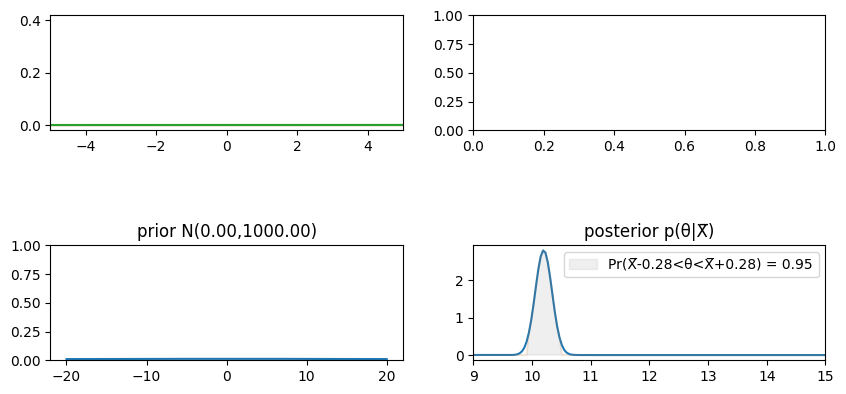

In [835]:
posterior_plot(σ2=1,a=0,b2=1000,n=49,X̅=10.2,c=.28,k=3)

In [836]:
interact(posterior_plot, 
    σ2=FloatSlider(min=0.1, max=10, step=0.1, value=1),
    a=FloatSlider(min=0, max=20, step=0.1, value=0),
    b2=FloatSlider(min=0, max=1000, step=1, value=1),
    n=FloatSlider(min=1, max=100, step=0.1, value=49),
    X̅=FloatSlider(min=0, max=20, step=0.1, value=10.2),
    c=FloatSlider(min=0, max=1, step=0.01, value=.28),    
    k=IntSlider(min=1, max=100, step =1, value = 3))


interactive(children=(FloatSlider(value=1.0, description='σ2', max=10.0, min=0.1), FloatSlider(value=0.0, desc…

<function __main__.posterior_plot(σ2, a, b2, n, X̅, c, k)>